In [1]:
import pandas as pd
import numpy as np

In [90]:
data = pd.read_csv("data/txt_reviews_Cleaned.csv")

## Feature Selection

In [3]:
data.columns

Index(['ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'ReviewSummary',
       'ReviewText', 'Review_Date', 'Helpfulness'],
      dtype='object')

In [91]:
## out of all columns, required only Score,ReviewSummary and ReviewText

data_ml = data[['ReviewSummary','ReviewText','Score']]

In [5]:
data_ml.head()

,ReviewSummary,ReviewText,Score
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,Healthy Dog Food,This is a very healthy dog food. Good for thei...,5
2,Bad,I fed this to my Golden Retriever and he hated...,1
3,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",2
4,The best weve tried so far,We have a 7 week old... He had gas and constip...,4


In [6]:
data_ml.head()

,ReviewSummary,ReviewText,Score
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,Healthy Dog Food,This is a very healthy dog food. Good for thei...,5
2,Bad,I fed this to my Golden Retriever and he hated...,1
3,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",2
4,The best weve tried so far,We have a 7 week old... He had gas and constip...,4


In [95]:
import swifter

In [96]:
data_ml['Score'] = data_ml['Score'].swifter.apply(lambda x : "Bad Score(1-2 stars)" if(x<3) else "average (3 star)" if(x==3) else "Good (4-5 stars)")

Dask Apply:   0%|          | 0/16 [00:00<?, ?it/s]

C:\Users\Murali Krishna\AppData\Local\Temp\ipykernel_29500\4252756319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml['Score'] = data_ml['Score'].swifter.apply(lambda x : "Bad Score(1-2 stars)" if(x<3) else "average (3 star)" if(x==3) else "Good (4-5 stars)")


In [9]:
## splitting target and input features
## Test and train data splitting

In [97]:
y = data_ml['Score']

x = data_ml.drop('Score',axis=1)

print(x.columns, y)

Index(['ReviewSummary', 'ReviewText'], dtype='object') 0             Good (4-5 stars)
1             Good (4-5 stars)
2         Bad Score(1-2 stars)
3         Bad Score(1-2 stars)
4             Good (4-5 stars)
                  ...         
568125        Good (4-5 stars)
568126        Good (4-5 stars)
568127        Good (4-5 stars)
568128        Good (4-5 stars)
568129        Good (4-5 stars)
Name: Score, Length: 568130, dtype: object


In [98]:
import sklearn

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, stratify=data_ml['Score'], random_state=73)

In [13]:
X_train.shape,X_test.shape

((426097, 2), (142033, 2))

In [14]:
y_train.size,y_test.size

(426097, 142033)

In [15]:
## Data PreProcessing -- Removal of unwanted text/char

In [16]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
nltk_stopwords = set(stopwords.words('english'))
print(len(nltk_stopwords),nltk_stopwords)

179 {'does', 'were', 'a', 'after', "that'll", 'more', 'further', 'but', 'you', 've', "didn't", 'when', 'an', 'y', 'than', "aren't", 'haven', 'itself', 'off', 'why', 'yourselves', 'into', 'few', 'couldn', 'before', 'other', 'them', 'm', 'from', 'about', 'those', 'of', 'ourselves', 'is', 'during', 'until', 'where', 'll', 'are', 'out', 'their', 'some', 'these', "you'd", 'hasn', 'both', 'very', 'while', 'not', 're', 'too', 'any', 'hadn', 'there', 'was', 'been', 'being', 'for', "won't", "she's", 'her', 'himself', 'i', 'do', 'can', 'own', "doesn't", 'will', 'theirs', 'if', "you'll", 'your', 'this', "mustn't", "needn't", "mightn't", "weren't", 'wouldn', 'mustn', 'didn', 'have', 'don', 'has', 'on', 'isn', 'over', 'against', 'then', 'having', 't', 'weren', "you've", 'below', 'through', 'just', 'yours', 'o', "you're", 'to', 'how', 'him', 'ours', 'won', 'd', 'myself', 'who', 'ma', 'down', 'aren', 'what', 'that', 'at', 'once', 'most', 'doing', 'be', 'it', 'ain', "it's", 'needn', 'here', 'because',

In [20]:
X_train.head()

,ReviewSummary,ReviewText
15784,Great Mushrooms!,These mushrooms are wonderful! They taste ric...
219831,Better Than Buttermilk,It doesn't happen often that I say this but th...
431816,Best Cappuccino buy,Actually this is for my wife who ordered these...
533305,Great protein!,Easy way to have a snack on hand that adds pro...
413755,"Nice Coffee, Pods Didn't Work for Us",I really love the idea of this coffee from the...


In [33]:
print(X_train["ReviewText"].iloc[8])

It seems like every time I find a really good product, the manufacturer stops making it. (The garbage products keep getting made year after year).  This product is no longer available at any of the stores around me.<br /><br />Luzianne makes great green tea.  It is, of course, not as strong as black tea. The taste is smooth.  The caffeine level is not too bad.  I like making sun tea with the larger bags. 4 bags to the gallon and 4 hours of sunshine makes fantastic tea.  If you want it stronger just squeeze excess liquids from the bags when removing.<br /><br />I just hope Amazon keeps selling this stuff in bulk.  The price ($25/case) is very good.  This is the only food product I have ever bought online.


In [35]:
print(re.sub('<.*?>|[^a-zA-Z]'," ",X_train["ReviewText"].iloc[8]))

It seems like every time I find a really good product  the manufacturer stops making it   The garbage products keep getting made year after year    This product is no longer available at any of the stores around me   Luzianne makes great green tea   It is  of course  not as strong as black tea  The taste is smooth   The caffeine level is not too bad   I like making sun tea with the larger bags    bags to the gallon and   hours of sunshine makes fantastic tea   If you want it stronger just squeeze excess liquids from the bags when removing   I just hope Amazon keeps selling this stuff in bulk   The price      case  is very good   This is the only food product I have ever bought online 


In [42]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()


def preprocess(raw_text, flag):
    #Removes html tags
    # Removing special characters and digits
    sentence = re.sub("<.*?>|[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t.strip() for t in tokens if t not in nltk_stopwords]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    elif(flag == 'lemm'):
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    else:
        raise Exception("Invalid Flag!! Pass 'stem / lemm' as falg value!!")
    return pd.Series([" ".join(clean_tokens)])

In [43]:
print(preprocess(data_ml["ReviewText"].iloc[8],flag="lemm"),data_ml.iloc[3])

0    best instant noodle tried spicy yes like spicy...
dtype: object ReviewSummary                                Not hot, not habanero
ReviewText       I have to admit, I was a sucker for the large ...
Score                                         Bad Score(1-2 stars)
Name: 3, dtype: object


In [44]:
## speeder version of apply
## run in cmd prompt with admin user

### conda install -c conda-forge swifter

In [46]:
temp_df = pd.DataFrame()
temp_df['text_SW'] = X_train['ReviewText'].swifter.apply(preprocess,flag='lemm')

Pandas Apply:   0%|          | 0/426097 [00:00<?, ?it/s]

In [47]:
X_train['ReviewText'] = temp_df['text_SW']

In [48]:
print(X_train.shape)
X_train.head()

(426097, 2)


,ReviewSummary,ReviewText
15784,Great Mushrooms!,mushroom wonderful taste rich woodsy add real ...
219831,Better Than Buttermilk,happen often say product saco cultured butterm...
431816,Best Cappuccino buy,actually wife ordered k cup already ststed reo...
533305,Great protein!,easy way snack hand add protein curb sugar low
413755,"Nice Coffee, Pods Didn't Work for Us",really love idea coffee family bob marley howe...


In [49]:
temp_df = pd.DataFrame()
temp_df['text_SW'] = X_test['ReviewText'].swifter.apply(preprocess,flag='lemm')

Pandas Apply:   0%|          | 0/142033 [00:00<?, ?it/s]

In [51]:
X_test['ReviewText'] = temp_df['text_SW']

In [52]:
print(X_test.shape)
X_test.head()

(142033, 2)


,ReviewSummary,ReviewText
209533,Excellent,tea smell amazing taste superb combination rea...
335288,GREAT guiltfree treat in 5 minutes,believe improved original adding teaspoon inst...
383384,Tastes good and lasts a long time!,enjoy gum taste great last much longer chew sa...
107772,Tasty Cookies,nana chocolate chocolate chip cooky tasty dair...
97554,Worked...with some unexpected side-effects.,little girl alot gas enfamil premium infant fo...


In [55]:
all_words_train = []
for t in X_train['ReviewText']:
    all_words_train.extend(t.split())

In [56]:
import matplotlib.pyplot as plt

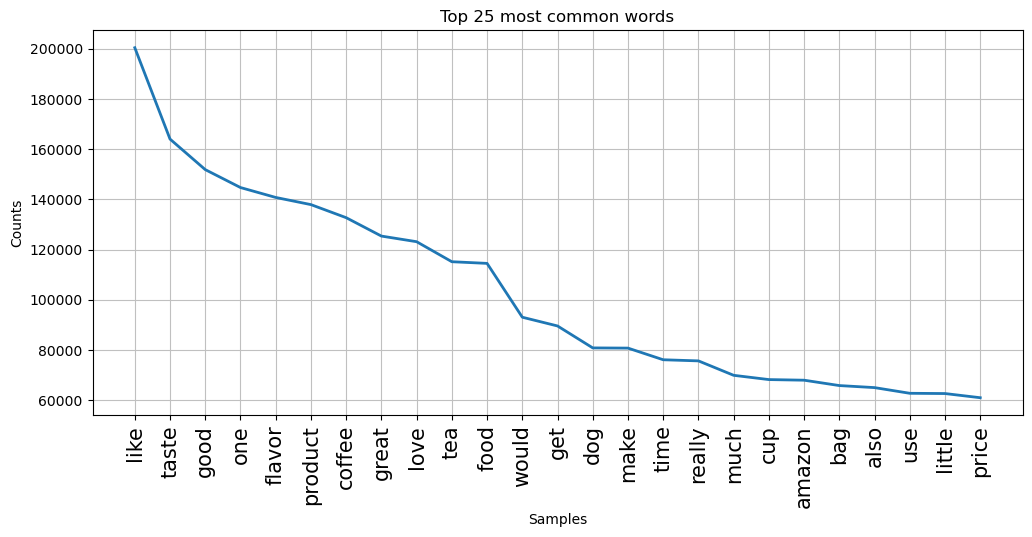

In [57]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words_train)
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [58]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2))

X_train_dtm = tfidf.fit_transform(X_train['ReviewText'])
X_test_dtm = tfidf.transform(X_test['ReviewText'])

In [35]:
## Model creation , Predection and Evalution Metrix

## Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_dtm, y_train)


C:\Users\Murali Krishna\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_test_pred = logistic_reg.predict(X_test_dtm)

Accuracy:  0.9018115508367773


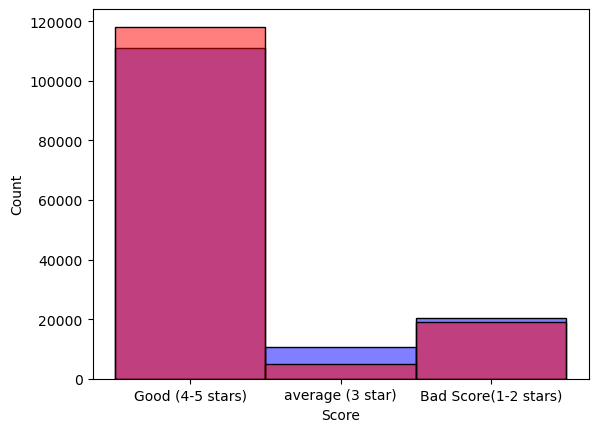

In [64]:
import seaborn as sns
import sklearn.metrics as metrics
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)


print('Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))

In [78]:
import pickle

In [83]:
# save the model to disk
filename = 'model.pkl'
vectorname = 'vector.pkl'

pickle.dump(logistic_reg, open(filename, 'wb'))
pickle.dump(tfidf,open(vectorname,'wb'))

In [125]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
vector = pickle.load(open(vectorname,'rb'))
x = data_ml["ReviewText"].iloc[2]
x_trans = preprocess(x,"lemm")
result = loaded_model.predict(vector.transform(x_trans))
print(result)

['Bad Score(1-2 stars)']


In [77]:
data_ml.iloc[2]

ReviewSummary                                                  Bad
ReviewText       I fed this to my Golden Retriever and he hated...
Score                                         Bad Score(1-2 stars)
Name: 2, dtype: object

In [123]:
i=15
print(y_test[y_test =='Bad Score(1-2 stars)'])


108978    Bad Score(1-2 stars)
128056    Bad Score(1-2 stars)
218925    Bad Score(1-2 stars)
310464    Bad Score(1-2 stars)
472997    Bad Score(1-2 stars)
                  ...         
316694    Bad Score(1-2 stars)
274665    Bad Score(1-2 stars)
271842    Bad Score(1-2 stars)
289153    Bad Score(1-2 stars)
377834    Bad Score(1-2 stars)
Name: Score, Length: 20492, dtype: object


In [124]:
print(X_test['ReviewText'].loc[310464])

The smell and taste of the Lickety Stik was an instant success with our dog.<br />But the dispensing ball dosen't move easily, very much of the time,<br />and it's a nuisance for us to keep helping the ball turn for our dog to get this treat.<br />We get more on our hands then our Golden gets in his mouth.<br />When we try to turn the ball for our dog, even we find it difficult.<br /><br />The roller BALL is a concern, we don't consider it 'pet safe'.<br />If our Golden Retriver got this bottle,<br />he could easily bite this roller ball out and would try to eat it.<br /><br />The ball requires a strong tounge to move it, even at that it gets stuck.<br />We can't imagine this stik being at all compatible with small dogs.<br />If you squeeze the bottle to force the liquid out around the ball<br />most of that drops to the ground between licks.<br /><br />This would be a great idea if it worked, and was truely 'pet safe'.
